In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

**In the data_by_year notebook we noticed that songs from a few decades before seems to be ones a lot more lirycals. The first hypothesis is that it may be related to the age og WW II**

**To continue or to discard that hypothesis we are scraping the lyrics of the songs to look for patterns.**

**In the first part of this notebook I do a clean up of the data and export it, the cleaned data is used in the scraper of this project which is allocated at scraper/scraper.py. That scraper dumps a dataset with the lyrics of the songs, that dataset is used in the second part of this notebook**

## 1 - Data cleanup

In [ ]:
metrics_by_song = pd.read_csv('data.csv', encoding='utf-8', error_bad_lines='ignore')
metrics_by_song.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12.0,1920,0.0936,149.976,0.634,1920.0
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7.0,1920-01-05,0.0534,86.889,0.950,1920.0
2,0.993,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4.0,1920,0.1740,97.600,0.689,1920.0


In [ ]:
types = pd.DataFrame(metrics_by_song.dtypes)
print(types.groupby(0).size())


0
int64       4
float64    11
object      4
dtype: int64


In [ ]:
print(metrics_by_song['year'].unique())
#100*metrics_by_year.isnull().sum()/metrics_by_year.shape[0]

[1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931.
 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943.
 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1968.
 2008. 2018. 2020. 1997. 1991. 2006. 2012. 2011. 2007. 1967. 1969. 1970.
 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982.
 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1992. 1993. 1994. 1995.
 1996. 1998. 1999. 2000. 2019. 2013. 2001. 2017. 2016. 2010. 2002. 2004.
 2005. 2015. 2003. 2009. 2021. 2014.   nan]


In [ ]:

for key, value in metrics_by_song.iteritems():
  print(key, ' uniques: ',metrics_by_song[key].unique())

acousticness  uniques:  [9.91e-01 6.43e-01 9.93e-01 ... 1.51e-04 7.72e-02 9.88e-02]
artists  uniques:  ["['Mamie Smith']" '["Screamin\' Jay Hawkins"]' "['Oscar Velazquez']" ...
 "['Slim Whitman']" "['Gordon Jenkins', 'Marshall Royal']"
 "['Frederick Loewe', 'Roddy McDowall', 'Franz Allers']"]
danceability  uniques:  [0.598  0.852  0.647  0.73   0.704  0.424  0.782  0.474  0.469  0.571
 0.688  0.579  0.353  0.643  0.453  0.525  0.528  0.468  0.397  0.744
 0.465  0.389  0.763  0.568  0.521  0.603  0.269  0.936  0.58   0.656
 0.697  0.613  0.369  0.559  0.641  0.745  0.737  0.602  0.639  0.482
 0.534  0.84   0.779  0.49   0.716  0.69   0.553  0.23   0.565  0.814
 0.498  0.487  0.68   0.575  0.368  0.72   0.679  0.623  0.652  0.306
 0.287  0.632  0.609  0.828  0.831  0.707  0.666  0.854  0.792  0.89
 0.257  0.747  0.439  0.577  0.551  0.478  0.382  0.509  0.0735 0.326
 0.761  0.526  0.842  0.685  0.433  0.739  0.212  0.79   0.446  0.427
 0.185  0.804  0.604  0.801  0.548  0.672  0.625  0.2

In [ ]:
100*metrics_by_song.isnull().sum()/metrics_by_song.shape[0]

acousticness        0.000000
artists             0.000000
danceability        0.000000
duration_ms         0.000000
energy              0.000000
explicit            0.000000
id                  0.000000
instrumentalness    0.000000
key                 0.000000
liveness            0.000000
loudness            0.000000
mode                0.000000
name                0.000000
popularity          0.003632
release_date        0.003632
speechiness         0.003632
tempo               0.003632
valence             0.003632
year                0.003632
dtype: float64

**Since this dataset has some null values, but they are not a significant percentaje we can get rid of some of the examples with null in their data. For popularity and duration we can impute the data with the mean or the mode, or even the median**

In [ ]:
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song.energy.isna()].index)
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song.explicit.isna()].index)
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song.id.isna()].index)
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song.liveness.isna()].index)
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song.loudness.isna()].index)
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song['mode'].isna()].index)
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song.name.isna()].index)
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song.year.isna()].index)
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song.tempo.isna()].index)
metrics_by_song = metrics_by_song.drop(metrics_by_song[metrics_by_song.valence.isna()].index)
metrics_by_song = metrics_by_song.drop(axis=1, columns=['release_date'])
metrics_by_song.popularity = metrics_by_song.popularity.fillna(metrics_by_song.popularity.mode()[0])
metrics_by_song.duration_ms = metrics_by_song.duration_ms.fillna(metrics_by_song.duration_ms.mode()[0])
metrics_by_song.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12.0,0.0936,149.976,0.634,1920.0
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7.0,0.0534,86.889,0.950,1920.0
2,0.993,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4.0,0.1740,97.600,0.689,1920.0


In [ ]:
metrics_by_song.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12.0,0.0936,149.976,0.634,1920.0
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7.0,0.0534,86.889,0.950,1920.0
2,0.993,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4.0,0.1740,97.600,0.689,1920.0


In [ ]:
100*metrics_by_song.isnull().sum()/metrics_by_song.shape[0]

acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
speechiness         0.0
tempo               0.0
valence             0.0
year                0.0
dtype: float64

In [ ]:
metrics_by_song.year = metrics_by_song.year.astype(int)
metrics_by_song.popularity = metrics_by_song.popularity.astype(int)
metrics_by_song.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.950,1920
2,0.993,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.689,1920


In [ ]:
metrics_by_song[['name', 'year']].sort_values(by=['year'], ascending='False').head(5)


,name,year
0,Keep A Song In Your Soul,1920
20374,"Phantasy Star IV Theme (From ""Phantasy Star IV...",1920
20375,"Road Rash Theme (From ""Road Rash"") [Genesis Mix]",1920
20376,"Brandenburg Concerto No. 2 in F major, BWV 104...",1920
20377,Mega Man: the Wily Wars [Genesis Mix],1920


In [ ]:
metrics_by_song_temp = metrics_by_song[['name', 'year', 'artists']].sort_values(by=['year'], ascending='False')

In [ ]:
# from google.colab import drive
# drive.mount('drive')


In [ ]:
# metrics_by_song_temp.to_csv('temp.csv',sep=',')
# !cp temp.csv '.' 

In [ ]:
# metrics_by_song_mask = metrics_by_song.loc[metrics_by_song['speechiness']>0.2]

In [ ]:
# metrics_by_song_mask.shape
# metrics_by_song_temp = metrics_by_song_mask[['name', 'year', 'artists']].sort_values(by=['year'], ascending='False')

In [ ]:
# from google.colab import drive
# drive.mount('drive')


In [ ]:
# metrics_by_song_temp.to_csv('temp.csv',sep=',')
# !cp temp.csv '.' 

## 2 - Lyrics Analytics

In [ ]:
from google.colab import drive


In [ ]:
lyrics_df = pd.read_csv('lyrics.csv')
lyrics_df.tail(5)

,song,lyrics,year
3151,If We Must Die,Killing us one by one In one way or another A...,1954
3152,Stagolee (Stagger Lee),"Stagolee was a bad man, everybody knows Spent...",1954
3153,Open Up The Doghouse (Two Cats Are Coming In),Open up the doghouse Open up the doghouse Rov...,1954
3154,Man Piaba,When I was a lad of three-foot-three Certain ...,1954
3155,Elijah Rock,Elijah Rock shout shout Elijah Rock comin' up...,1954


In [ ]:
print(lyrics_df['lyrics'].shape)

(3156,)


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
lyrics_df = lyrics_df.drop(lyrics_df[lyrics_df['lyrics'].isna()].index)

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
lyrics_df_old_songs = lyrics_df.drop(lyrics_df[lyrics_df['year']<=1945].index)

In [ ]:
lyrics_df_old_songs.tail(5)

,song,lyrics,year
3151,If We Must Die,Killing us one by one In one way or another A...,1954
3152,Stagolee (Stagger Lee),"Stagolee was a bad man, everybody knows Spent...",1954
3153,Open Up The Doghouse (Two Cats Are Coming In),Open up the doghouse Open up the doghouse Rov...,1954
3154,Man Piaba,When I was a lad of three-foot-three Certain ...,1954
3155,Elijah Rock,Elijah Rock shout shout Elijah Rock comin' up...,1954


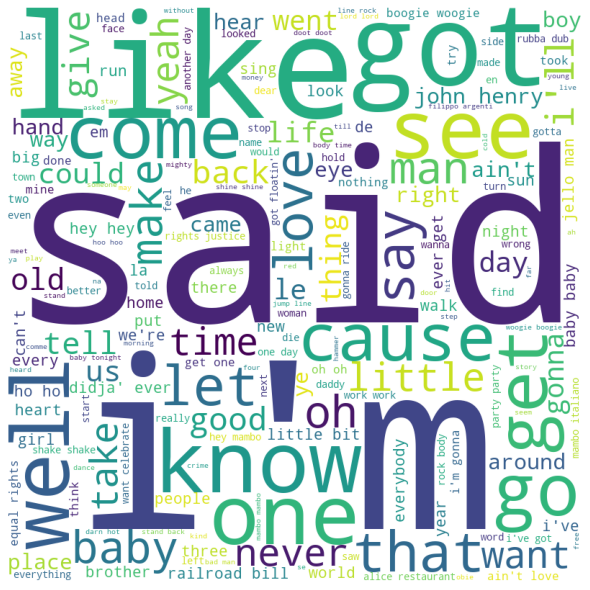

In [ ]:
comment_words = '' 
for val in lyrics_df_old_songs.lyrics: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 
                    
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Cloudword don't give so much of an idea of what the lyrics are about. Now we will use nltk to explore ngrams

In [ ]:
from nltk.util import bigrams, ngrams
from nltk.probability import FreqDist
import re

In [ ]:
comments_words_tokenized = word_tokenize(comment_words)
bigrams_ = list(bigrams(comments_words_tokenized))

In [ ]:
filtered_bigrams = [bigram for bigram in bigrams_ if not bigram[0] in stop_words
                    and bigram[0] in str(re.search('[a-zA-Z0-9]{3,}', bigram[0]))
                    and bigram[1] in str(re.search('[a-zA-Z0-9]{3,}', bigram[1]))]
filtered_bigrams

[('hampstead', 'fair'),
 ('came', 'upon'),
 ('upon', 'mother'),
 ('mother', 'goose'),
 ('turned', 'her'),
 ('loose', 'she'),
 ('screaming', 'and'),
 ('foreign', 'student'),
 ('student', 'said'),
 ('really', 'true'),
 ('true', 'there'),
 ('elephants', 'and'),
 ('lions', 'too'),
 ('piccadilly', 'circus'),
 ('walked', 'down'),
 ('bathing', 'pond'),
 ('try', 'and'),
 ('catch', 'some'),
 ('sun', 'saw'),
 ('hundred', 'schoolgirls'),
 ('schoolgirls', 'sobbing'),
 ('sobbing', 'into'),
 ('believe', 'they'),
 ('schoolboy', 'and'),
 ('bearded', 'lady'),
 ('lady', 'said'),
 ('start', 'your'),
 ('raving', 'and'),
 ('misbehaving', 'you'),
 ('sorry', 'then'),
 ('play', 'with'),
 ('long', 'red'),
 ('red', 'beard'),
 ('laughed', 'down'),
 ('putting', 'green'),
 ('holes', 'four'),
 ('four', 'and'),
 ('twenty', 'labourers'),
 ('labourers', 'were'),
 ('labouring', 'digging'),
 ('believe', 'they'),
 ('knew', 'that'),
 ('long', 'john'),
 ('john', 'silver'),
 ('silver', 'saw'),
 ('saw', 'johnny'),
 ('johnny'

In [ ]:
freq_dist = FreqDist(filtered_bigrams)
freq_dist.most_common(20)

[(('come', 'on'), 38),
 (('john', 'henry'), 35),
 (('railroad', 'bill'), 30),
 (('little', 'bit'), 28),
 (('ever', 'get'), 27),
 (('jello', 'man'), 25),
 (('tell', 'you'), 23),
 (('get', 'one'), 23),
 (('equal', 'rights'), 22),
 (('rights', 'and'), 22),
 (('chill', 'out'), 21),
 (('anything', 'you'), 20),
 (('revolution', 'will'), 20),
 (('rock', 'on'), 20),
 (('another', 'day'), 19),
 (('hey', 'mambo'), 18),
 (('mambo', 'italiano'), 18),
 (('shine', 'on'), 18),
 (('shot', 'down'), 18),
 (('rock', 'your'), 17)]

In [ ]:
unigrams_ = list(ngrams(comments_words_tokenized, 1))


In [ ]:
filtered_unigrams = [unigram for unigram in unigrams_ if not unigram[0] in stop_words
                    and unigram[0] in str(re.search('[a-zA-Z0-9]{3,}', unigram[0]))]


In [ ]:
most_common_unigrams = FreqDist(filtered_unigrams)
most_common_unigrams.most_common(10)

[(('got',), 229),
 (('man',), 178),
 (('get',), 173),
 (('said',), 168),
 (('one',), 163),
 (('love',), 147),
 (('baby',), 138),
 (('see',), 126),
 (('like',), 125),
 (('come',), 125)]

In [ ]:
len(comments_words_tokenized)
print(len(filtered_bigrams))

11899


In [ ]:
freq_dist = FreqDist(bigrams_)
freq_dist.most_common(20)

[(('i', "'m"), 236),
 ((',', 'i'), 207),
 (('in', 'the'), 162),
 (('do', "n't"), 137),
 (('and', 'i'), 130),
 ((',', 'and'), 124),
 (('to', 'the'), 119),
 (('it', "'s"), 114),
 (('on', 'the'), 102),
 (('gon', 'na'), 94),
 (('i', 'can'), 94),
 (('ca', "n't"), 86),
 (('and', 'the'), 83),
 (('that', "'s"), 77),
 (('and', 'a'), 71),
 (('ai', "n't"), 71),
 ((',', 'you'), 71),
 (('i', "'ll"), 65),
 ((',', '``'), 62),
 (('of', 'the'), 60)]

In [ ]:
metrics_by_song

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27525,0.823000,['Ray Conniff'],0.586,196867,0.263,0,3W0q8sLSdzRgRKe0ZaJzef,0.771000,3,0.0891,-12.487,1,Night and Day,36,0.0320,113.975,0.2420,1960
27526,0.940000,['Elvis Presley'],0.302,153933,0.173,0,2DcxxFzIQ6l5RcQlh3VOlU,0.000066,6,0.1340,-16.070,1,Hawaiian Sunset,36,0.0335,92.023,0.3590,1961
27527,0.904000,['Bill Evans Trio'],0.505,409760,0.195,0,5cx1qoUiJhVJX4tHUiauNj,0.896000,2,0.1100,-20.817,0,Waltz for Debby (take 1) - Alternate Take,36,0.0417,91.291,0.4340,1961
27528,0.762000,['Bert Kaempfert'],0.367,158973,0.337,0,4RRFpTX7hQRYSTo9efZ8yg,0.498000,8,0.0899,-6.785,1,La Vie En Rose,39,0.0269,107.802,0.4190,1961


In [ ]:
high_speechiness_df = metrics_by_song[(metrics_by_song['speechiness'] > .8) & (metrics_by_song['year'] < 1946)] 

In [ ]:
high_speechiness_df.shape

(1286, 18)

In [ ]:

high_speechiness_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
10,0.9520,['Dorville'],0.688,150067,0.220,0,07jrRR1CUUoPb1FLfSy9Jh,0.000000,6,0.2620,-15.208,0,Oouin,0,0.845,82.024,0.414,1920
357,0.7970,['Fernando Pessoa'],0.695,98200,0.263,0,021ht4sdgPcrDgSk7JTbKY,0.000000,0,0.1480,-22.136,1,Capítulo 2.16 - Banquero Anarquista,0,0.957,102.009,0.655,1922
364,0.7940,['Fernando Pessoa'],0.676,99100,0.235,0,0OYGe21oScKJfanLyM7daU,0.000000,11,0.2100,-22.447,0,Capítulo 2.8 - Banquero Anarquista,0,0.960,96.777,0.724,1922
365,0.5780,['Fernando Pessoa'],0.750,132700,0.229,0,0PE42H6tslQuyMMiGRiqtb,0.000000,2,0.3140,-22.077,1,Capítulo 2.25 - Banquero Anarquista,0,0.955,102.629,0.531,1922
369,0.7540,['Fernando Pessoa'],0.687,96600,0.198,0,0cC9CYjLRIzwchQ42xVnq6,0.000000,4,0.1970,-24.264,0,Capítulo 1.23 - Banquero Anarquista,0,0.962,78.453,0.478,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24516,0.1100,['Эрих Мария Ремарк'],0.758,100059,0.174,1,0Vdz8pekxvC4qZf6Oz7Iv0,0.000002,0,0.1180,-21.254,1,Часть 105.3 - Триумфальная арка,0,0.927,80.397,0.561,1945
24519,0.1240,['Эрих Мария Ремарк'],0.715,108800,0.147,1,0VsPC9mm7Dxeax7I1oJwTm,0.000364,0,0.0931,-20.276,1,Часть 100.2 - Триумфальная арка,0,0.929,126.562,0.639,1945
24522,0.3480,['Эрих Мария Ремарк'],0.701,99143,0.188,1,0W46GeG9RhE9Muit5MIIX6,0.000246,0,0.0904,-19.994,1,Часть 107.4 & Часть 108.1 - Триумфальная арка,0,0.940,104.436,0.693,1945
24523,0.0681,['Эрих Мария Ремарк'],0.720,132900,0.146,1,0WCqpx84PtHMaAEpMZAsG7,0.000039,0,0.1830,-22.008,1,Часть 233.2 - Триумфальная арка,0,0.885,114.506,0.601,1945


In [ ]:
from google.colab import files
high_speechiness_df.to_csv('high_speechiness.csv') 
files.download('high_speechiness.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Doing a manual exploration of the dataset filtered by high speechiness we can see that the reason which songs from before 1945 appear to be very high in spechiness it is because they are actually audio books. 

#### We may want to do the same exploration but for years from 1946 and so on. 

In [ ]:
high_speechiness_df = metrics_by_song[(metrics_by_song['speechiness'] > .8) & (metrics_by_song['year'] > 1945)] 

In [ ]:
high_speechiness_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
5460,0.650,['Honoré de Balzac'],0.701,142000,0.2160,0,09ldNeEJ2VP5oXOoqscwdp,0.000000,7,0.349,-20.327,1,Kapitel 11 - Die läßliche Sünde,0,0.937,131.130,0.7320,1947
5996,0.593,"['Georgette Heyer', 'Brigitte Carlsen']",0.713,120491,0.2600,0,6HZbdFm3jn9b6NGtivZSeY,0.000000,7,0.324,-20.594,0,Kapitel 1 - Die drei Ehen der Grand Sophy,15,0.954,114.496,0.3150,1950
6050,0.947,['Elizabeth Bishop'],0.707,158040,0.0424,0,3711kwnnsCsCatYDccXrtS,0.000002,5,0.137,-25.688,1,The Fish,11,0.936,109.847,0.2870,1950
6843,0.763,['Langston Hughes'],0.651,69027,0.0809,0,3RXOKHGxFK0t2k9zJJHb6y,0.000000,0,0.157,-21.800,0,I Have Known Rivers,18,0.808,92.814,0.4200,1954
7968,0.942,['Sam Cooke'],0.540,32680,0.3480,0,3P3xONUKHDynX6Fs93VHZl,0.000280,11,0.416,-18.788,0,Soul - Hidden Track,40,0.857,91.646,0.4970,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,0.857,"['Ernest Hemingway', 'Christian Brückner']",0.635,275320,0.2710,0,76ujaXtzcEeyg32xBRgGL9,0.000015,11,0.271,-17.522,0,Kapitel 14 - Der alte Mann und das Meer - Erzä...,10,0.962,151.978,0.5110,1952
25892,0.724,"['Ernest Hemingway', 'Christian Brückner']",0.670,536027,0.2760,0,7MY8idovLORCSepPlLOTYb,0.000004,11,0.633,-18.277,0,Kapitel 19 - Der alte Mann und das Meer - Erzä...,9,0.960,108.000,0.2950,1952
26116,0.707,['Victor Borge'],0.471,355427,0.5990,0,5NyjVC0mxyE0CRG3eWP4LP,0.000001,11,0.945,-18.474,1,Phonetic Punctuation - Voice,8,0.870,84.792,0.0378,1953
26379,0.890,['Robert Frost'],0.637,62773,0.1030,0,4pVznb6hGGISOqJtrVl3GC,0.000000,0,0.316,-20.033,1,The Road Not Taken,15,0.917,69.452,0.4830,1955


In [ ]:
high_speechiness_df.to_csv('high_speechiness_recents.csv') 
files.download('high_speechiness_recents.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Manual exploration of songs with high speechiness newer than 1945 we found that there are only few of them and the majority are audio books. We find no records withh high speechiness newer than 1955. This may explain why old records may seem to be songs with lots of lyrics, becase they are actually mostly audio books. 

In [ ]:
speechines_lvl_1 = metrics_by_song[(metrics_by_song['speechiness'] < .1)]
speechines_lvl_1 = speechines_lvl_1.index
number_of_rows = len(speechines_lvl_1)
number_of_rows

21918

In [ ]:
def get_percentage_of_songs(df, column, min_value, max_value):
  filtered_df = df[(df[column] > min_value) & (df[column] <= max_value)]
  index_filtered = filtered_df.index
  number_of_rows_filtered = len(index_filtered)
  index = df.index
  number_of_rows = len(index)
  percentage = (number_of_rows_filtered / number_of_rows) * 100 
  return percentage

In [ ]:
speechines_lvl_1 = get_percentage_of_songs(metrics_by_song, 'speechiness', 0, .1)
speechines_lvl_1

79.61133309117326

In [ ]:
speechines_lvl_2 = get_percentage_of_songs(metrics_by_song, 'speechiness', .1, .2)
speechines_lvl_2

8.677806029785689

In [ ]:
speechines_lvl_2 = get_percentage_of_songs(metrics_by_song, 'speechiness', .2, .3)
speechines_lvl_2

3.1783508899382493

In [ ]:
metrics_by_song_newer_than_1945 = metrics_by_song[(metrics_by_song['year'] > 1945)] 

In [ ]:
from_ = 0.0
to_ = 0.1
for i in range(10):
  print(f'Speechiness from {round(from_, 1)} to {round(to_, 1)} is: {round(get_percentage_of_songs(metrics_by_song_newer_than_1945, "speechiness", from_, to_), 2)}' )
  from_ += .1
  to_ += .1


Speechiness from 0.0 to 0.1 is: 85.71
Speechiness from 0.1 to 0.2 is: 7.45
Speechiness from 0.2 to 0.3 is: 2.98
Speechiness from 0.3 to 0.4 is: 1.98
Speechiness from 0.4 to 0.5 is: 0.7
Speechiness from 0.5 to 0.6 is: 0.2
Speechiness from 0.6 to 0.7 is: 0.05
Speechiness from 0.7 to 0.8 is: 0.03
Speechiness from 0.8 to 0.9 is: 0.08
Speechiness from 0.9 to 1.0 is: 0.74


## Getting the percentage of songs newer than 1945 we can confirm that records with high speechiness is very low, years in which we almost cannot find audiobooks